In [995]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve


## 전처리
from sklearn.model_selection import train_test_split #학습용 평가용 데이터 나누기
from sklearn.preprocessing import StandardScaler #표준화 작업
from sklearn.preprocessing import LabelEncoder # 인코딩


## 알고리즘

from sklearn.linear_model import LogisticRegression # 로지스틱 회귀모델
import statsmodels.api as sm # 다중선형회귀분석
from sklearn.tree import DecisionTreeClassifier # 의사결정나무분석
from sklearn.neural_network import MLPClassifier ## 다층인공신경망
## 검정

from sklearn.metrics import confusion_matrix # 정오분류표
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score , roc_auc_score# 정확도 , 정밀도 , 재현율 , f1 , roc_aue

## 최적화
from sklearn.pipeline import make_pipeline , Pipeline
from sklearn.model_selection import GridSearchCV

In [996]:
train = pd.read_csv("d:/IBA 동아리/data/titanic/train.csv")

## 데이터 
1. survival - 생존여부 ( 0 = No, 1 = Yes )
2. pclass - 티켓 등급 ( 1 = 1st, 2 = 2nd, 3 = 3rd )
3. sex - 성별
4. Age - 나이
5. sibsp - 타이타닉에 승선한 형제자매 또는 배우자의 수
6. parch - 타이타닉에 승선한 부모 - 자식의 수
7. ticket - 티켓 번호
8. fare - 승선 요금
9. cabin - 선실 번호
10. embarked - 승선 항구 이름 ( C = Cherbourg, Q = Queenstown, S = Southampton )

## 데이터 탐색

In [997]:
## 데이터 셋의 상위 5개 항목 출력
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [998]:
## 데이터 셋의 각 필드 분포(평균,최소값,최대값 등)를 살펴보기
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [999]:
## 데이터 정보 확인 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1000]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1001]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [1002]:
##생존한사람, 사망한 사람의 수 확인하기
survival = train['Survived'].sum()
no_survival = train['Survived'].count().sum() - survival
print(f"생존한 사람의 수 : {survival} ")
print(f"사망한 사람의 수 : {no_survival}")

생존한 사람의 수 : 342 
사망한 사람의 수 : 549


In [1003]:
##생존한사람, 사망한 사람의 수 확인하기
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [1004]:
## 각 클래스 별 탑승객 분포 확인하기
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [1005]:
## 성('Sex')별 탑승객 분포 확인하기
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [1006]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1007]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [1008]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 데이터 시각화

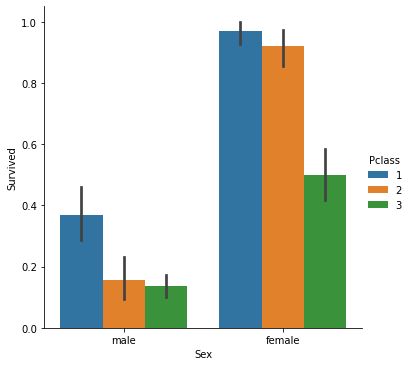

In [1009]:
sns.catplot(x = 'Sex' , y = 'Survived' , hue = 'Pclass' , kind = 'bar' , data = train)

모든 클래스에서 female이 생존 확률이 male보다 높은 걸 알 수 있다.
또한 남자,여자 상관없이 클래스가 높을 수록 생존 확률이 높다

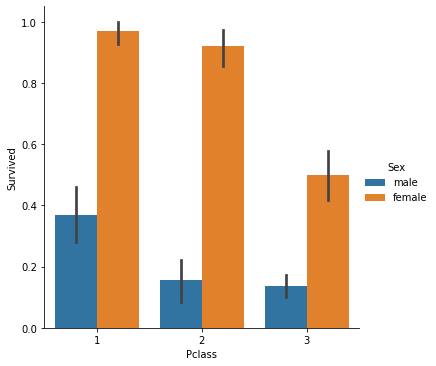

In [1010]:
sns.catplot(x = 'Pclass' , y = 'Survived' , hue = 'Sex' , kind = 'bar' , data = train)

위와 마찬가지로 모든 클래스에서 여자가 더 살 확률이 높고, 클래스가 높을 수록 생존할 확률이 높다

C:\Users\bbba2\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\bbba2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


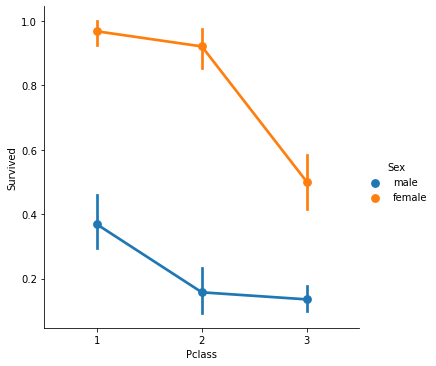

In [1011]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data= train)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

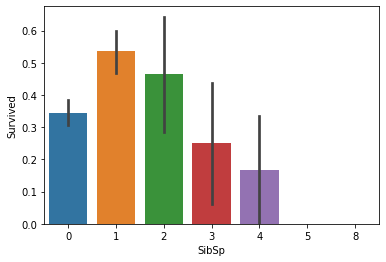

In [1012]:
sns.barplot(x = 'SibSp' , y = 'Survived'  , data = train)

형제자매의 수가 1~2명 정도 있을 때, 생존할 확률이 높은 것을 알 수 있다.

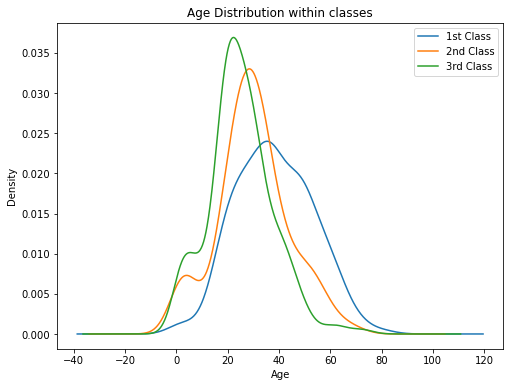

In [1013]:
plt.figure(figsize=(8,6))
train['Age'][train['Pclass']==1].plot(kind='kde')
train['Age'][train['Pclass']==2].plot(kind='kde')
train['Age'][train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class','3rd Class' ])

확실히 알 수 있는건 클래스가 높을 수록 나이가 많은 사람의 비중이 커진다

나이가 어릴 수록 생존률이 높은 것을 확인할 수 있다.

C:\Users\bbba2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


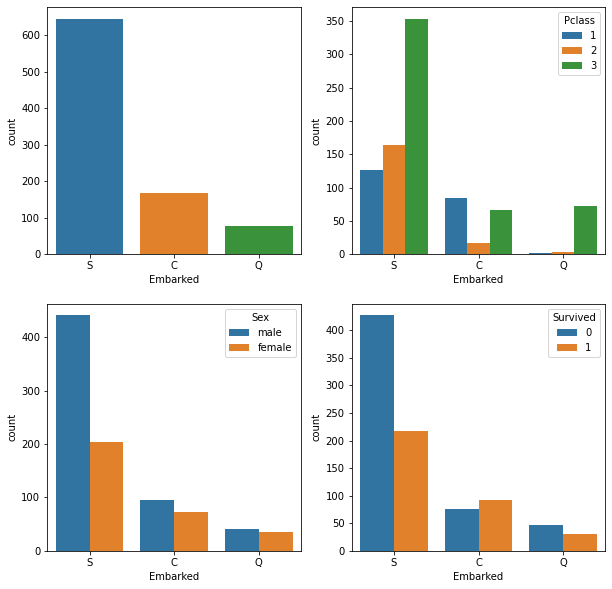

In [1014]:
f ,ax = plt.subplots(2,2, figsize=(10,10))
sns.countplot('Embarked', data=train, ax=ax[0,0])

sns.countplot(x = 'Embarked', hue = 'Pclass' , data = train , ax=ax[0,1])

sns.countplot(x = 'Embarked'  , hue = 'Sex' , data = train , ax=ax[1,0])

sns.countplot(x = 'Embarked'  , hue = 'Survived' , data = train , ax=ax[1,1])


plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

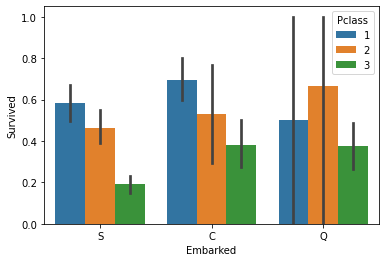

In [1015]:
sns.barplot(x = 'Embarked' , y = 'Survived' , hue = 'Pclass' , data = train)

1. 전체적으로 S에 가장 많은 사람이 탑승함
2. C와 Q는 남녀의 비율이 비슷하고 , S는 남자가 더 많다
3. 생존확률이 S가 가장 낮다

## 데이터 전처리

### Sex

In [1016]:
## male = 0 , female = 1 로 변환
train['Sex'] = train['Sex'].map({'male': 0 , 'female':1})  

### Embarked

In [1017]:
##'Embarked' 필드의 결측치 2개는 값이 가장 많은 'S'로 할당하기
train['Embarked'] = train['Embarked'].fillna('S')
    
# 'Embarked' 숫자로 매핑
train['Embarked'] = train['Embarked'].map({'S':0,'C':1,'Q':2})

In [1018]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [1019]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0


### Age

In [1020]:
train['Age'].fillna(train['Age'].mean(),inplace=True)

In [1021]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


### FamilySize

In [1022]:
# 가족수 = 형제자매 + 부모님 + 자녀 + 본인
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = 1
for dataset in train:
    dataset['SibSp'] = dataset['SibSp']
# 가족수 > 1이면 동승자 있음
train.loc[train['FamilySize'] > 1, 'IsAlone'] = 0

In [1023]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1


### Name

In [1024]:
## 이름 성에 따른 분류
train['Title'] = train['Name'].str.extract('([\w]+)\.', expand=False)

In [1025]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1,Mr


In [1026]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Jonkheer      1
Capt          1
Sir           1
Lady          1
Mme           1
Don           1
Countess      1
Ms            1
Name: Title, dtype: int64

In [1027]:
train['Title'] = train['Title'].apply(lambda x :0 if x =="Mr" else 1 if x=="Miss" else 2 if x=="Mrs" else 3 if x=="Master" else 4)

In [1028]:
train['Title'].value_counts()

0    517
1    182
2    125
3     40
4     27
Name: Title, dtype: int64

In [1029]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  FamilySize   891 non-null    int64  
 13  IsAlone      891 non-null    int64  
 14  Title        891 non-null    int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 104.5+ KB


In [1030]:
## 필요없는 col 삭제
drop_column = ['PassengerId','Name','SibSp','Parch','Ticket','Cabin']

train = train.drop(drop_column , axis = 1)

In [1031]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    int64  
 6   FamilySize  891 non-null    int64  
 7   IsAlone     891 non-null    int64  
 8   Title       891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [1032]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,0,22.0,7.2500,0,2,0,0
1,1,1,1,38.0,71.2833,1,2,0,2
2,1,3,1,26.0,7.9250,0,1,1,1
3,1,1,1,35.0,53.1000,0,2,0,2
4,0,3,0,35.0,8.0500,0,1,1,0


In [1033]:
X = train.drop("Survived" , axis =1)
y = train["Survived"]

In [1034]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 1)

In [1035]:
## 함수의 활성화
stdsc = StandardScaler()

In [1036]:
X_train.iloc[:,:] = stdsc.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = stdsc.transform(X_test.iloc[:,:])

C:\Users\bbba2\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\bbba2\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


## 모델학습 - 로지스틱회귀 방식

In [1037]:
model = LogisticRegression() 
model.fit(X_train,y_train) # 학습시키기

LogisticRegression()

In [1038]:
y_pred = model.predict(X_test)
y_test

y_pred_p = model.predict_proba(X_test)

In [1039]:
print(y_pred_p)

[[0.10503181 0.89496819]
 [0.93358765 0.06641235]
 [0.15311912 0.84688088]
 [0.34990437 0.65009563]
 [0.13483497 0.86516503]
 [0.90936937 0.09063063]
 [0.88673927 0.11326073]
 [0.05402202 0.94597798]
 [0.46815995 0.53184005]
 [0.3091187  0.6908813 ]
 [0.92135999 0.07864001]
 [0.43218505 0.56781495]
 [0.79356653 0.20643347]
 [0.82500744 0.17499256]
 [0.35004464 0.64995536]
 [0.5935918  0.4064082 ]
 [0.86394241 0.13605759]
 [0.90344291 0.09655709]
 [0.94722168 0.05277832]
 [0.40105711 0.59894289]
 [0.93890641 0.06109359]
 [0.88809614 0.11190386]
 [0.01206281 0.98793719]
 [0.73121899 0.26878101]
 [0.2410298  0.7589702 ]
 [0.92671491 0.07328509]
 [0.10466835 0.89533165]
 [0.21922523 0.78077477]
 [0.80395746 0.19604254]
 [0.05597149 0.94402851]
 [0.39361476 0.60638524]
 [0.60788303 0.39211697]
 [0.84319909 0.15680091]
 [0.38112424 0.61887576]
 [0.92907289 0.07092711]
 [0.70868142 0.29131858]
 [0.66583477 0.33416523]
 [0.93364517 0.06635483]
 [0.44984178 0.55015822]
 [0.90612302 0.09387698]


In [1040]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,91,15
1,22,51


In [1041]:
print("오분류 개수 : %d" %(y_test != y_pred).sum())
print("정확도 : %.3f" %accuracy_score(y_test,y_pred))
print("정밀도 : %.3f" %precision_score(y_test,y_pred))
print("재현율 : %.3f" %recall_score(y_test,y_pred))
print("f1 : %.3f" %f1_score(y_test,y_pred))
print("auc : %.3f" %roc_auc_score(y_test,y_pred))

오분류 개수 : 37
정확도 : 0.793
정밀도 : 0.773
재현율 : 0.699
f1 : 0.734
auc : 0.779


### GridSearch 최적화

In [1042]:
logistic = LogisticRegression() #로지스틱 회귀 모델 객체 생성

In [1043]:
## 훈련셋 테스트 셋 나누기
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 10 , stratify = y)
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(712, 8) (179, 8) (712,) (179,)


In [1044]:
penalty = ['l1','l2'] # 페널티 하이퍼파라미터 값의 후보를 만듭니다.
C = np.logspace(0,4,10) # 규제 하이퍼파라미터 값의 후보 범위를 만듭니다.
hyperparameters = dict(C=C , penalty = penalty)

In [1045]:
gridsearch = GridSearchCV(logistic, hyperparameters , cv = 5 , scoring = 'accuracy' , n_jobs = -1) # 그리그 서치 객체 생성
gridsearch.fit(X_train,y_train)

C:\Users\bbba2\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.81032207        nan 0.80893332        nan 0.80470797
        nan 0.80610657        nan 0.81032207        nan 0.80891362
        nan 0.80752487        nan 0.80469812        nan 0.80890377
        nan 0.80750517]
  warnings.warn(
C:\Users\bbba2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [1046]:
##최적화 결과 정확도
print('fianl params' , gridsearch.best_params_)
print('best score' , gridsearch.best_score_)

fianl params {'C': 1.0, 'penalty': 'l2'}
best score 0.8103220722939032


- 하이퍼파라미터튜닝 이후 정확도가 0.793에서 0.810로 향상

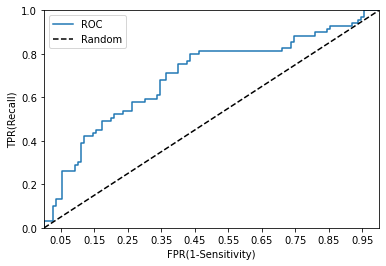

In [1047]:
# ROC 곡선의 시각화
y_pred_p = model.predict_proba(X_test) # 확률값으로 표시
def roc_curve_plot(y_test, pred_proba_c1):
    #임계값에 따른 FPR, TPR 값을반환 받음
    fprs, tprs, thresholds  = roc_curve(y_test, pred_proba_c1)
    # ROC곡선을 그래프로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    # FPR X축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, y_pred_p[:, 1])

## 의사결정나무

In [1048]:
## 함수의 활성화
stdsc = StandardScaler() 

In [1049]:
## 훈련셋 테스트 셋 나누기
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 10 , stratify = y)
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(712, 8) (179, 8) (712,) (179,)


In [1056]:
X_train[:,:] = stdsc.fit_transform(X_train[:,:])
X_test[:,:] = stdsc.transform(X_test[:,:])

TypeError: '(slice(None, None, None), slice(None, None, None))' is an invalid key

In [1051]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train) # 학습시키기

DecisionTreeClassifier()

In [1052]:
y_pred = model.predict(X_test)
y_test

y_pred_p = model.predict_proba(X_test)

In [1053]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,95,15
1,19,50


In [1054]:
print("오분류 개수 : %d" %(y_test != y_pred).sum())
print("정확도 : %.3f" %accuracy_score(y_test,y_pred))
print("정밀도 : %.3f" %precision_score(y_test,y_pred))
print("재현율 : %.3f" %recall_score(y_test,y_pred))
print("f1 : %.3f" %f1_score(y_test,y_pred))
print("auc : %.3f" %roc_auc_score(y_test,y_pred))

오분류 개수 : 34
정확도 : 0.810
정밀도 : 0.769
재현율 : 0.725
f1 : 0.746
auc : 0.794


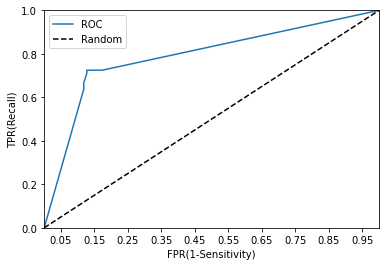

In [1055]:
# ROC 곡선의 시각화
y_pred_p = tree.predict_proba(X_test) # 확률값으로 표시
def roc_curve_plot(y_test, pred_proba_c1):
    #임계값에 따른 FPR, TPR 값을반환 받음
    fprs, tprs, thresholds  = roc_curve(y_test, pred_proba_c1)
    # ROC곡선을 그래프로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    # FPR X축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, y_pred_p[:, 1])

- 의사결정나무모델이 정확도 0.816으로 0.814인 로지스틱 모델보다 더 높음!